In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/resume projects/Deep-Learning-Car-Brand-master/Datasets/train'
valid_path = '/content/drive/MyDrive/resume projects/Deep-Learning-Car-Brand-master/Datasets/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/resume projects/Deep-Learning-Car-Brand-master/Datasets/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/resume projects/Deep-Learning-Car-Brand-master/Datasets/Train/audi',
 '/content/drive/MyDrive/resume projects/Deep-Learning-Car-Brand-master/Datasets/Train/mercedes',
 '/content/drive/MyDrive/resume projects/Deep-Learning-Car-Brand-master/Datasets/Train/lamborghini']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
x

<KerasTensor: shape=(None, 100352) dtype=float32 (created by layer 'flatten')>

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/resume projects/Deep-Learning-Car-Brand-master/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/resume projects/Deep-Learning-Car-Brand-master/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 21s 13s/step - loss: 8.4378 - accuracy: 0.3125 - val_loss: 3.6613 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 17s 12s/step - loss: 4.3828 - accuracy: 0.4375 - val_loss: 11.0981 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 17s 12s/step - loss: 7.1062 - accuracy: 0.3906 - val_loss: 13.1112 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 17s 12s/step - loss: 7.9624 - accuracy: 0.3906 - val_loss: 9.6797 - val_accuracy: 0.3103
Epoch 5/50
2/2 [==============================] - 17s 12s/step - loss: 5.4439 - accuracy: 0.4375 - val_loss: 4.0359 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 17s 12s/step - loss: 1.8789 - accuracy: 0.5000 - val_loss: 2.7147 - val_accuracy: 0.5345
Epoch 7/50
2/2 [==============================] - 17s 12s/step - loss: 3.7174 - accuracy: 0.3906 - val_loss: 2.2146 - val_accuracy: 0.5172
Epoch 8/50
2/2 [=========

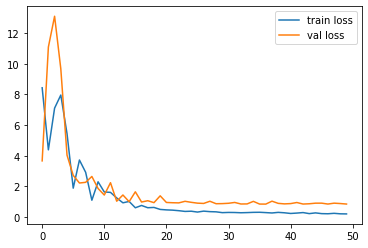

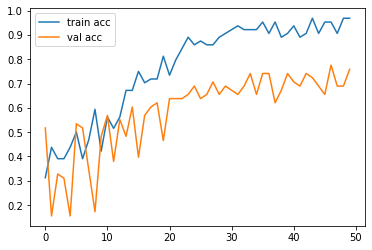

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/resume projects/Deep-Learning-Car-Brand-master/model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[3.15515026e-02, 3.67704051e-04, 9.68080819e-01],
       [6.39922470e-02, 5.02079666e-01, 4.33928102e-01],
       [2.02849526e-02, 8.61245155e-01, 1.18469931e-01],
       [4.52599265e-02, 4.47407186e-01, 5.07332921e-01],
       [1.60677582e-01, 5.36072552e-01, 3.03249925e-01],
       [4.96478379e-03, 3.36939320e-02, 9.61341262e-01],
       [1.70725863e-02, 9.29162681e-01, 5.37647344e-02],
       [7.87860435e-03, 5.58745503e-01, 4.33375865e-01],
       [8.06565464e-01, 1.39745265e-01, 5.36892228e-02],
       [2.03070845e-02, 9.37818229e-01, 4.18746918e-02],
       [6.79869890e-01, 3.15114766e-01, 5.01532946e-03],
       [4.23770398e-04, 9.89711642e-01, 9.86454915e-03],
       [6.14530267e-03, 9.92710114e-01, 1.14464608e-03],
       [3.05146389e-02, 5.18089056e-01, 4.51396346e-01],
       [1.41529083e-01, 5.89039385e-01, 2.69431561e-01],
       [2.84572542e-01, 1.19065404e-01, 5.96362114e-01],
       [2.11967424e-01, 5.01924872e-01, 2.86107719e-01],
       [8.80477391e-03, 9.30425

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/resume projects/Deep-Learning-Car-Brand-master/model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/resume projects/Deep-Learning-Car-Brand-master/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
img_data

array([[[[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.264496, -116.04567 , -122.91137 ],
         [-103.18214 , -115.96331 , -122.82902 ],
         [-103.08018 , -115.86135 , -122.72706 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.00959 , -115.818214, -122.719215],
         [-103.01743 , -115.82606 , -122.72706 ],
         [-103.021355, -115.82998 , -122.73098 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-102.96645 , -115.80253 , -122.73882 ],
         [-102.95861 , -115.794685, -122.73098 ],
         [-102.95861 , -115.794685, -122.73098 ]],

        ...,

        [[-103.04096 , -115.96723 , -1

In [ ]:
model.predict(img_data)

array([[4.1842465e-03, 9.3970407e-04, 9.9487609e-01]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([False])